In [1]:
%matplotlib inline

morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'

import h5py
import os
from astropy.table import Table

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ngals = 1000
_z = np.zeros(ngals)
zarr = np.linspace(0, 3, ngals)
mrarr = np.linspace(-25, -10, ngals)


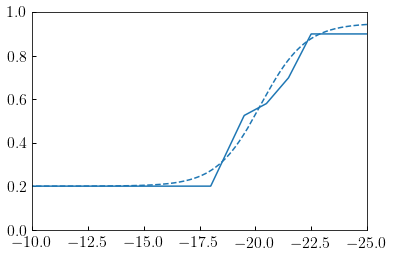

In [3]:
fq_ri_z0_magr_table = [-22.5, -21.5, -20.5, -19.5, -18]
fq_ri_z0_table = [0.8, 0.7, 0.62, 0.45, 0.2]

fq_gr_z0_magr_table = [-22.5, -21.5, -20.5, -19.5, -18]
fq_gr_z0_table = [0.9, 0.7, 0.58, 0.525, 0.2]


def sigmoid(x, x0=0, k=1, ymin=0, ymax=1):
    """
    """
    height_diff = ymax-ymin
    return ymin + height_diff/(1 + np.exp(-k*(x-x0)))


fig, ax = plt.subplots(1, 1)

mrarr = np.linspace(-25, -10, ngals)

__=ax.plot(mrarr, np.interp(mrarr, fq_gr_z0_magr_table, fq_gr_z0_table), color=mblue)
__=ax.plot(mrarr, sigmoid(mrarr, x0=-20.25, k=1., ymin=0.95, ymax=0.2), '--', color=mblue)

# __=ax.plot(mrarr, np.interp(mrarr, fq_ri_z0_magr_table, fq_ri_z0_table), color=morange)
# __=ax.plot(mrarr, sigmoid(mrarr, x0=-20, k=1, ymin=0.8, ymax=0.2), '--', color=morange)


xlim = ax.set_xlim(-10, -25)
ylim = ax.set_ylim(0, 1)

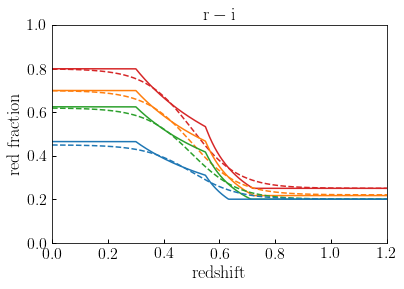

In [4]:
from cosmodc2.sdss_colors.analytical_r_minus_i import (
    quiescent_fraction_ri, red_sequence_peak_ri, main_sequence_peak_ri,
    default_red_peak_ri, default_red_peak_ri_zevol, default_fq_ri_blueshift_table,
    default_fq_ri_floor_table, default_fq_ri)


fq_ri_mr22p5 = quiescent_fraction_ri(_z-22.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr21p5 = quiescent_fraction_ri(_z-21.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr20p5 = quiescent_fraction_ri(_z-20.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr19p5 = quiescent_fraction_ri(_z-19.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr18p0 = quiescent_fraction_ri(_z-18.0, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)

fig, ax = plt.subplots(1, 1)

__=ax.plot(zarr, fq_ri_mr22p5, color=mred)
__=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.8, ymax=0.25), '--', color=mred)

__=ax.plot(zarr, fq_ri_mr21p5, color=morange)
__=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.7, ymax=0.22), '--', color=morange)

__=ax.plot(zarr, fq_ri_mr20p5, color=mgreen)
__=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.62, ymax=0.2), '--', color=mgreen)

__=ax.plot(zarr, fq_ri_mr19p5, color=mblue)
__=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.45, ymax=0.2), '--', color=mblue)

# __=ax.plot(zarr, fq_ri_mr18p0, color=mpurple)

xlim = ax.set_xlim(0, 1.2)
ylim = ax.set_ylim(0, 1)
xlabel = ax.set_xlabel(r'${\rm redshift}$')
ylabel = ax.set_ylabel(r'${\rm red\ fraction}$')
title = ax.set_title(r'${\rm r-i}$')





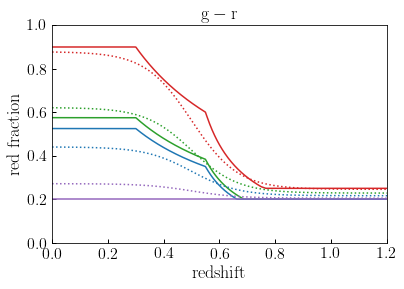

In [5]:
from cosmodc2.sdss_colors.sigmoid_g_minus_r import quiescent_fraction_gr as quiescent_fraction_gr2

from cosmodc2.sdss_colors.analytical_g_minus_r import (
    quiescent_fraction_gr, red_sequence_peak_gr, main_sequence_peak_gr,
    default_red_peak_gr, default_red_peak_gr_zevol, default_fq_gr_blueshift_table,
    default_fq_gr_floor_table, default_fq_gr)

ngals = 1000
_z = np.zeros(ngals)
zarr = np.linspace(0, 3, ngals)
mrarr = np.linspace(-25, -10, ngals)

fq_gr_mr22p5 = quiescent_fraction_gr(_z-22.5, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)
fq_gr_mr21p5 = quiescent_fraction_gr(_z-21.5, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)
fq_gr_mr20p5 = quiescent_fraction_gr(_z-20.5, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)
fq_gr_mr19p5 = quiescent_fraction_gr(_z-19.5, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)
fq_gr_mr18p0 = quiescent_fraction_gr(_z-18.0, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)

fq_gr_mr22p5b = quiescent_fraction_gr2(_z-22.5, zarr)
fq_gr_mr21p5b = quiescent_fraction_gr2(_z-21.5, zarr)
fq_gr_mr20p5b = quiescent_fraction_gr2(_z-20.5, zarr)
fq_gr_mr19p5b = quiescent_fraction_gr2(_z-19.5, zarr)
fq_gr_mr18p0b = quiescent_fraction_gr2(_z-18.0, zarr)

fig, ax = plt.subplots(1, 1)

__=ax.plot(zarr, fq_gr_mr22p5, color=mred)
# __=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.9, ymax=0.25), '--', color=mred)
__=ax.plot(zarr, fq_gr_mr22p5b, ':', color=mred)

# __=ax.plot(zarr, fq_gr_mr21p5, color=morange)
# __=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.7, ymax=0.22), '--', color=morange)
# __=ax.plot(zarr, fq_gr_mr21p5b, ":", color=morange)

__=ax.plot(zarr, fq_gr_mr20p5, color=mgreen)
# __=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.58, ymax=0.2), '--', color=mgreen)
__=ax.plot(zarr, fq_gr_mr20p5b, ':', color=mgreen)

__=ax.plot(zarr, fq_gr_mr19p5, color=mblue)
# __=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.525, ymax=0.2), '--', color=mblue)
__=ax.plot(zarr, fq_gr_mr19p5b, ':', color=mblue)


__=ax.plot(zarr, fq_gr_mr18p0, color=mpurple)
__=ax.plot(zarr, fq_gr_mr18p0b, ':', color=mpurple)

xlim = ax.set_xlim(0, 1.2)
ylim = ax.set_ylim(0, 1)
xlabel = ax.set_xlabel(r'${\rm redshift}$')
ylabel = ax.set_ylabel(r'${\rm red\ fraction}$')
title = ax.set_title(r'${\rm g-r}$')





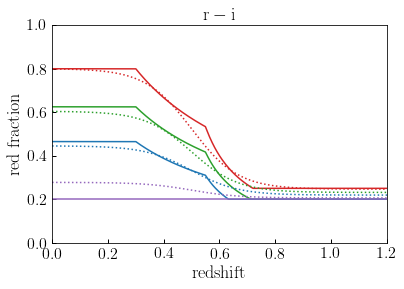

In [10]:
from cosmodc2.sdss_colors.sigmoid_r_minus_i import quiescent_fraction_ri as quiescent_fraction_ri2

from cosmodc2.sdss_colors.analytical_r_minus_i import (
    quiescent_fraction_ri, red_sequence_peak_ri, main_sequence_peak_ri,
    default_red_peak_ri, default_red_peak_ri_zevol, default_fq_ri_blueshift_table,
    default_fq_ri_floor_table, default_fq_ri)

ngals = 1000
_z = np.zeros(ngals)
zarr = np.linspace(0, 3, ngals)
mrarr = np.linspace(-25, -10, ngals)

fq_ri_mr22p5 = quiescent_fraction_ri(_z-22.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr21p5 = quiescent_fraction_ri(_z-21.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr20p5 = quiescent_fraction_ri(_z-20.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr19p5 = quiescent_fraction_ri(_z-19.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr18p0 = quiescent_fraction_ri(_z-18.0, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)

fq_ri_mr22p5b = quiescent_fraction_ri2(_z-22.5, zarr)
fq_ri_mr21p5b = quiescent_fraction_ri2(_z-21.5, zarr)
fq_ri_mr20p5b = quiescent_fraction_ri2(_z-20.5, zarr)
fq_ri_mr19p5b = quiescent_fraction_ri2(_z-19.5, zarr)
fq_ri_mr18p0b = quiescent_fraction_ri2(_z-18.0, zarr)

fig, ax = plt.subplots(1, 1)

__=ax.plot(zarr, fq_ri_mr22p5, color=mred)
# __=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.9, ymax=0.25), '--', color=mred)
__=ax.plot(zarr, fq_ri_mr22p5b, ':', color=mred)

# __=ax.plot(zarr, fq_ri_mr21p5, color=morange)
# __=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.7, ymax=0.22), '--', color=morange)
# __=ax.plot(zarr, fq_ri_mr21p5b, ":", color=morange)

__=ax.plot(zarr, fq_ri_mr20p5, color=mgreen)
# __=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.58, ymax=0.2), '--', color=mrieen)
__=ax.plot(zarr, fq_ri_mr20p5b, ':', color=mgreen)

__=ax.plot(zarr, fq_ri_mr19p5, color=mblue)
# __=ax.plot(zarr, sigmoid(zarr, x0=0.5, k=12, ymin=0.525, ymax=0.2), '--', color=mblue)
__=ax.plot(zarr, fq_ri_mr19p5b, ':', color=mblue)


__=ax.plot(zarr, fq_ri_mr18p0, color=mpurple)
__=ax.plot(zarr, fq_ri_mr18p0b, ':', color=mpurple)

xlim = ax.set_xlim(0, 1.2)
ylim = ax.set_ylim(0, 1)
xlabel = ax.set_xlabel(r'${\rm redshift}$')
ylabel = ax.set_ylabel(r'${\rm red\ fraction}$')
title = ax.set_title(r'${\rm r-i}$')





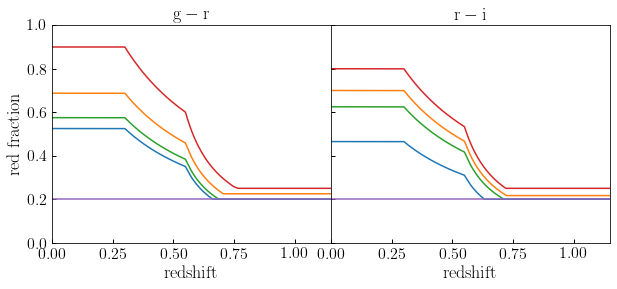

In [7]:
from cosmodc2.sdss_colors.analytical_g_minus_r import (
    quiescent_fraction_gr, red_sequence_peak_gr, main_sequence_peak_gr,
    default_red_peak_gr, default_red_peak_gr_zevol, default_fq_gr_blueshift_table,
    default_fq_gr_floor_table, default_fq_gr)

from cosmodc2.sdss_colors.analytical_r_minus_i import (
    quiescent_fraction_ri, red_sequence_peak_ri, main_sequence_peak_ri,
    default_red_peak_ri, default_red_peak_ri_zevol, default_fq_ri_blueshift_table,
    default_fq_ri_floor_table, default_fq_ri)

ngals = 1000
_z = np.zeros(ngals)
zarr = np.linspace(0, 3, ngals)
mrarr = np.linspace(-25, -10, ngals)

fq_gr_mr22p5 = quiescent_fraction_gr(_z-22.5, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)
fq_gr_mr21p5 = quiescent_fraction_gr(_z-21.5, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)
fq_gr_mr20p5 = quiescent_fraction_gr(_z-20.5, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)
fq_gr_mr19p5 = quiescent_fraction_gr(_z-19.5, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)
fq_gr_mr18p0 = quiescent_fraction_gr(_z-18.0, zarr, default_fq_gr, 
                                     default_fq_gr_blueshift_table, default_fq_gr_floor_table)

fq_ri_mr22p5 = quiescent_fraction_ri(_z-22.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr21p5 = quiescent_fraction_ri(_z-21.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr20p5 = quiescent_fraction_ri(_z-20.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr19p5 = quiescent_fraction_ri(_z-19.5, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)
fq_ri_mr18p0 = quiescent_fraction_ri(_z-18.0, zarr, default_fq_ri, 
                                     default_fq_ri_blueshift_table, default_fq_ri_floor_table)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)  #  smash left and right plots

__=ax1.plot(zarr, fq_gr_mr22p5, color=mred)
__=ax1.plot(zarr, fq_gr_mr21p5, color=morange)
__=ax1.plot(zarr, fq_gr_mr20p5, color=mgreen)
__=ax1.plot(zarr, fq_gr_mr19p5, color=mblue)
__=ax1.plot(zarr, fq_gr_mr18p0, color=mpurple)

__=ax2.plot(zarr, fq_ri_mr22p5, color=mred)
__=ax2.plot(zarr, fq_ri_mr21p5, color=morange)
__=ax2.plot(zarr, fq_ri_mr20p5, color=mgreen)
__=ax2.plot(zarr, fq_ri_mr19p5, color=mblue)
__=ax2.plot(zarr, fq_ri_mr18p0, color=mpurple)

xlim = ax1.set_xlim(0, 1.15)
ylim = ax1.set_ylim(0, 1)
xlabel = ax1.set_xlabel(r'${\rm redshift}$')
xlabel = ax2.set_xlabel(r'${\rm redshift}$')
ylabel = ax1.set_ylabel(r'${\rm red\ fraction}$')
title = ax1.set_title(r'${\rm g-r}$')
title = ax2.set_title(r'${\rm r-i}$')


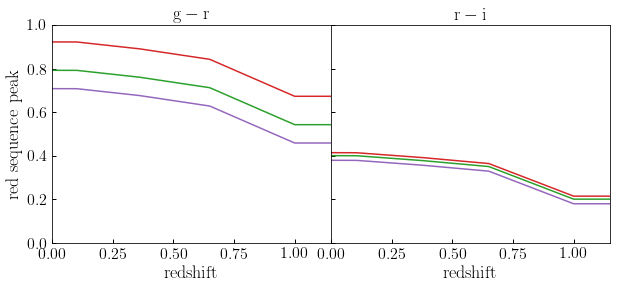

In [8]:
ri_peak_mr22p5 = red_sequence_peak_ri(_z-22.5, default_red_peak_ri, zarr, default_red_peak_ri_zevol)
ri_peak_mr21p5 = red_sequence_peak_ri(_z-21.5, default_red_peak_ri, zarr, default_red_peak_ri_zevol)
ri_peak_mr20p5 = red_sequence_peak_ri(_z-20.5, default_red_peak_ri, zarr, default_red_peak_ri_zevol)
ri_peak_mr19p5 = red_sequence_peak_ri(_z-19.5, default_red_peak_ri, zarr, default_red_peak_ri_zevol)
ri_peak_mr18p0 = red_sequence_peak_ri(_z-18.0, default_red_peak_ri, zarr, default_red_peak_ri_zevol)

gr_peak_mr22p5 = red_sequence_peak_gr(_z-22.5, default_red_peak_gr, zarr, default_red_peak_gr_zevol)
gr_peak_mr21p5 = red_sequence_peak_gr(_z-21.5, default_red_peak_gr, zarr, default_red_peak_gr_zevol)
gr_peak_mr20p5 = red_sequence_peak_gr(_z-20.5, default_red_peak_gr, zarr, default_red_peak_gr_zevol)
gr_peak_mr19p5 = red_sequence_peak_gr(_z-19.5, default_red_peak_gr, zarr, default_red_peak_gr_zevol)
gr_peak_mr18p0 = red_sequence_peak_gr(_z-18.0, default_red_peak_gr, zarr, default_red_peak_gr_zevol)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)  #  smash left and right plots

__=ax1.plot(zarr, gr_peak_mr22p5, color=mred)
__=ax1.plot(zarr, gr_peak_mr20p5, color=mgreen)
__=ax1.plot(zarr, gr_peak_mr18p0, color=mpurple)

__=ax2.plot(zarr, ri_peak_mr22p5, color=mred)
__=ax2.plot(zarr, ri_peak_mr20p5, color=mgreen)
__=ax2.plot(zarr, ri_peak_mr18p0, color=mpurple)

xlim = ax1.set_xlim(0, 1.15)
ylim = ax1.set_ylim(0, 1)
xlabel = ax1.set_xlabel(r'${\rm redshift}$')
xlabel = ax2.set_xlabel(r'${\rm redshift}$')
ylabel = ax1.set_ylabel(r'${\rm red\ sequence\ peak}$')
title = ax1.set_title(r'${\rm g-r}$')
title = ax2.set_title(r'${\rm r-i}$')


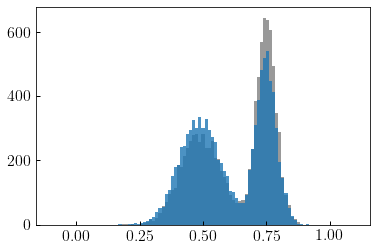

In [9]:
from cosmodc2.sdss_colors.analytical_g_minus_r import g_minus_r
from cosmodc2.sdss_colors.sigmoid_g_minus_r import g_minus_r as g_minus_r2

ngals = int(1e4)
_z = np.zeros(ngals)
redshift = np.zeros(ngals) + 0.05

mr22p5_gr, __ = g_minus_r(_z - 22.5, redshift)
mr22p5_grb, __ = g_minus_r2(_z - 22.5, redshift)

mr21p5_gr, __ = g_minus_r(_z - 21.5, redshift)
mr21p5_grb, __ = g_minus_r2(_z - 21.5, redshift)

mr20p5_gr, __ = g_minus_r(_z - 20.5, redshift)
mr20p5_grb, __ = g_minus_r2(_z - 20.5, redshift)

mr19p5_gr, __ = g_minus_r(_z - 19.5, redshift)
mr19p5_grb, __ = g_minus_r2(_z - 19.5, redshift)

mr18p0_gr, __ = g_minus_r(_z - 18.0, redshift)
mr18p0_grb, __ = g_minus_r2(_z - 18.0, redshift)

mr16p0_gr, __ = g_minus_r(_z - 16.0, redshift)
mr16p0_grb, __ = g_minus_r2(_z - 16.0, redshift)

fig, ax = plt.subplots(1, 1)

gr_bins = np.linspace(-0.1, 1.1, 100)

# __=ax.hist(mr22p5_gr, bins=gr_bins, alpha=0.8, color='gray')
# __=ax.hist(mr22p5_grb, bins=gr_bins, alpha=0.8, color=mred)

# __=ax.hist(mr21p5_gr, bins=gr_bins, alpha=0.8, color='gray')
# __=ax.hist(mr21p5_grb, bins=gr_bins, alpha=0.8, color=morange)

# __=ax.hist(mr20p5_gr, bins=gr_bins, alpha=0.8, color='gray')
# __=ax.hist(mr20p5_grb, bins=gr_bins, alpha=0.8, color=mgreen)

__=ax.hist(mr19p5_gr, bins=gr_bins, alpha=0.8, color='gray')
__=ax.hist(mr19p5_grb, bins=gr_bins, alpha=0.8, color=mblue)

# __=ax.hist(mr18p0_gr, bins=gr_bins, alpha=0.8, color='gray')
# __=ax.hist(mr18p0_grb, bins=gr_bins, alpha=0.8, color=mpurple)


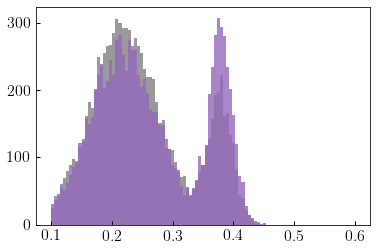

In [20]:
from cosmodc2.sdss_colors.analytical_r_minus_i import r_minus_i
from cosmodc2.sdss_colors.sigmoid_r_minus_i import r_minus_i as r_minus_i2

ngals = int(1e4)
_z = np.zeros(ngals)
redshift = np.zeros(ngals) + 0.05

mr22p5_ri, __ = r_minus_i(_z - 22.5, redshift)
mr22p5_rib, __ = r_minus_i2(_z - 22.5, redshift)

mr21p5_ri, __ = r_minus_i(_z - 21.5, redshift)
mr21p5_rib, __ = r_minus_i2(_z - 21.5, redshift)

mr20p5_ri, __ = r_minus_i(_z - 20.5, redshift)
mr20p5_rib, __ = r_minus_i2(_z - 20.5, redshift)

mr19p5_ri, __ = r_minus_i(_z - 19.5, redshift)
mr19p5_rib, __ = r_minus_i2(_z - 19.5, redshift)

mr18p0_ri, __ = r_minus_i(_z - 18.0, redshift)
mr18p0_rib, __ = r_minus_i2(_z - 18.0, redshift)

mr16p0_ri, __ = r_minus_i(_z - 16.0, redshift)
mr16p0_rib, __ = r_minus_i2(_z - 16.0, redshift)

fig, ax = plt.subplots(1, 1)

ri_bins = np.linspace(0.1, 0.6, 100)

# __=ax.hist(mr22p5_ri, bins=ri_bins, alpha=0.8, color='gray')
# __=ax.hist(mr22p5_rib, bins=ri_bins, alpha=0.8, color=mred)

# __=ax.hist(mr21p5_ri, bins=ri_bins, alpha=0.8, color='gray')
# __=ax.hist(mr21p5_rib, bins=ri_bins, alpha=0.8, color=morange)

# __=ax.hist(mr20p5_ri, bins=ri_bins, alpha=0.8, color='gray')
# __=ax.hist(mr20p5_rib, bins=ri_bins, alpha=0.8, color=mgreen)

# __=ax.hist(mr19p5_ri, bins=ri_bins, alpha=0.8, color='gray')
# __=ax.hist(mr19p5_rib, bins=ri_bins, alpha=0.8, color=mblue)

__=ax.hist(mr18p0_ri, bins=ri_bins, alpha=0.8, color='gray')
__=ax.hist(mr18p0_rib, bins=ri_bins, alpha=0.8, color=mpurple)
